# Embedding
--- 

## RNN (순환신경망, Recurrent Neural Network)
- CNN과 함께 딥러닝의 양대 산맥을 이루는 신경망
- 음성 인식, 문장 번역, 시계열 데이터를 통한 예측에서 활용함.
- 케라스에서는 RNN위한 4개 계층을 제공함 (Embedding, SimpleRNN, LSTM, Conv1D)
## IMDB 데이터 셋
- 영화 리뷰에 대한 데이터 50,000개로 이루어져 있다.
- 25,000개의 훈련데이터와 25,000개의 테스트 데이터가 각각 50%씩 긍정 리뷰와 부정 리뷰로 구성되어 있다.
- 이미 전처리가 되어 있어서 각 리뷰가 숫자로 변환되어있다.(토큰화가 이미 처리되어 있음)
---

## 1) 패키지 준비하기

In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import seaborn as sns
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences # 문장 길이를 통일 시키는 용도
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

## 2) 데이터셋 준비하기

In [2]:
# 가장 빈번하게 사용되는 단어의 개수.
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


훈련 데이터 (25000,) 레이블 (25000,)
검증 데이터 (25000,) 레이블 (25000,)


c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 4) 탐색적 데이터 분석
첫 번째 데이터 확인하기
하나의 문장에 사용된 단어들에 대해 토큰화가 처리된 결과값.

가장 빈번하게 사용되는 글자의 토큰번호가 1

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### 첫 번째 레이블값 확인
레이블 값은 0=긍정, 1=부정을 의미함

In [4]:
print(y_train[0])

1


### 각 단어별 토큰번호 확인하기

In [5]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### 임의의 훈련 데이터에 대해 원 단어를 대입하여 문장 구성하기

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in x_train[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 5) 데이터셋 분할하기

In [7]:
np.random.seed(777)

### 데이터를 동일한 길이로 맞추기
Embedding층을 사용하기 위해서는 시퀀스 데이터(여기서는 문장을 나타냅니다)의 길이가 전부 동일해야 한다.

길이를 맞추기 위해 pad_sequences() 함수 사용

- 데이터가 지정해준 길이보다 짧은 경우 0으로 채워 넣으며, 긴 경우는 잘라낸다.
- 단어의 뒤에 패딩을 추가하고 싶다면, padding 인자를 post로 지정한다.

In [8]:
# 최대 문장 길이
max_len = 500

print('Before pad_sequences: ', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding = 'pre')

#  원래 단어의 앞에 ‘지정해준 단어의 길이 – 원래 단어의 길이’(500 –218)만큼 0이 추가된 것을 볼 수 있다.
print('After pad_sequences: ', len(pad_x_train[0]))

print(pad_x_train[0])

Before pad_sequences:  218
After pad_sequences:  500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    

### 6) 모델 개발
#### 모델 정의

In [9]:
model = Sequential()

# Embedding층은 모델의 첫 번째 층으로만 사용할 수 있으며, 주로 순환 신경망과 연결하여 사용한다.
# 1) input_dim 인자는 학습 데이터셋에서 사용한 단어의 개수(10,000)
# 2) output_dim 인자는 임베딩 벡터의 크기(32)
# -> 이와 같이 인자를 설정하고 나면 Embedding층은 (None, 500, 32) 형태의 출력을 가지게 됩니다.
# -> 500은 입력값의 길이를 지정했던 max_len의 길이와 같으며, 32는 임베딩 벡터의 크기와 같습니다.
# 3) input_length인자는 Flatten 층을 사용하기 위해 전달.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))

# Embedding층 이후에 Dense층을 연결
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


#### 모델 정의

In [10]:
# 모델 학습시키기
result = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 30, validation_data=(pad_x_test, y_test), callbacks = [
    #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/30
782/782 [==============================] - 8s 10ms/step - loss: 0.4166 - acc: 0.8006 - val_loss: 0.3029 - val_acc: 0.8695
Epoch 2/30
782/782 [==============================] - 7s 10ms/step - loss: 0.1916 - acc: 0.9277 - val_loss: 0.2762 - val_acc: 0.8844- los
Epoch 3/30
782/782 [==============================] - 8s 10ms/step - loss: 0.1053 - acc: 0.9702 - val_loss: 0.2944 - val_acc: 0.8843
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 0.0520 - acc: 0.9899 - val_loss: 0.3251 - val_acc: 0.8774
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.0235 - acc: 0.9974 - val_loss: 0.3633 - val_acc: 0.8720

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/30
782/782 [==============================] - 7s 10ms/step - loss: 0.0111 - acc: 0.9997 - val_loss: 0.3688 - val_acc: 0.8772
Epoch 7/30
782/782 [==============================] - 8s 10ms/step - loss: 0.0078 - acc: 0.9998 - val_loss: 0.3879 - 

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.416589,0.80060,0.302926,0.86948,0.0010
2,0.191570,0.92768,0.276241,0.88440,0.0010
3,0.105310,0.97016,0.294430,0.88428,0.0010
4,0.051995,0.98992,0.325100,0.87744,0.0010
5,0.023526,0.99736,0.363348,0.87204,0.0010
6,0.011140,0.99968,0.368779,0.87716,0.0005
7,0.007795,0.99984,0.387938,0.87668,0.0005


### 7) 학습 결과 평가
#### 학습 결과 시각화

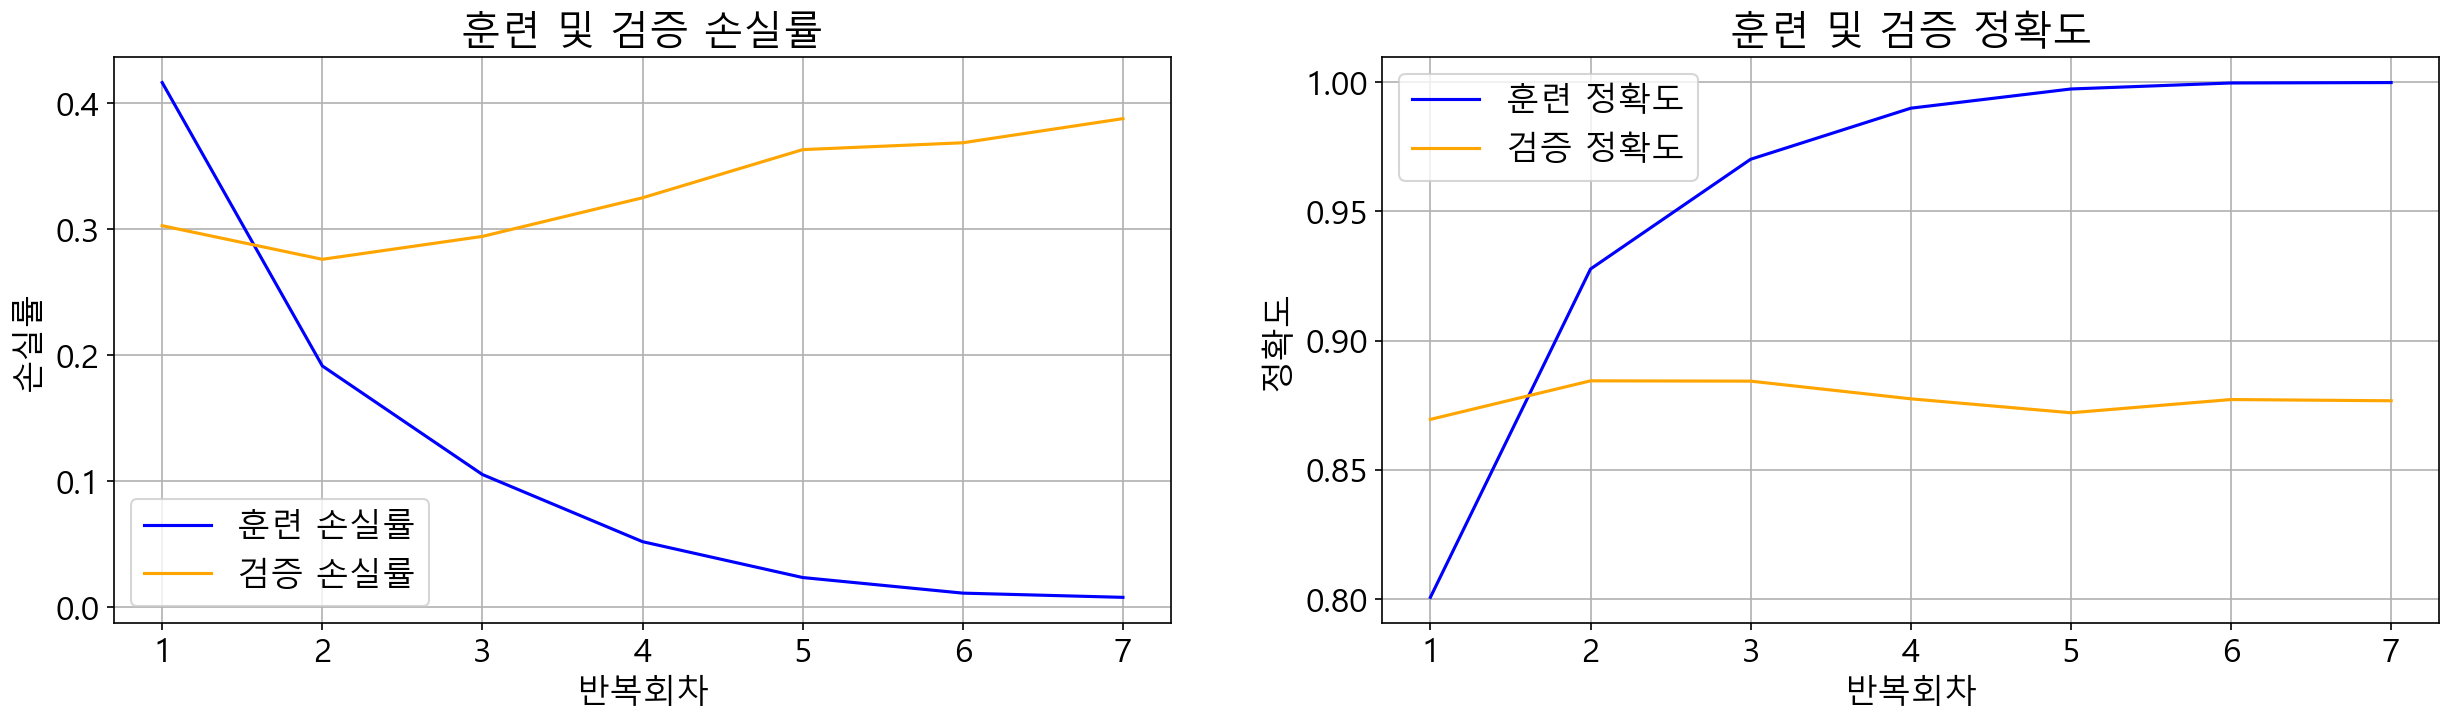

In [23]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

### 모델 성능 평가

In [24]:
evaluate = model.evaluate(pad_x_test, y_test)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

782/782 [==============================] - 3s 3ms/step - loss: 0.3879 - acc: 0.8767
최종 손실률: 0.387938, 최종 정확도: 0.876680


## 8) 학습 결과 적용

In [25]:
result = model.predict(pad_x_test)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

25000개의 검증 데이터가 1개의 경우의 수를 갖는다.


array([0.04834163], dtype=float32)

In [26]:
f_results = result.flatten()
f_results

array([0.04834163, 0.999721  , 0.7220622 , ..., 0.00370195, 0.01868654,
       0.93926114], dtype=float32)

In [27]:
kdf = DataFrame({
    '결과값': y_test,
    '예측치' : np.round(f_results)
})

kdf['예측치'] = kdf['예측치'].astype('int')
kdf

,결과값,예측치
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
24995,1,1
24996,1,1
24997,0,0
24998,0,0


### 실제 결과값과 머신러닝에 의한 예측값 비교

In [28]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기 
cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
cmdf1 = DataFrame(cm, columns=['예측값(P)', '예측값(N)'], index=['실제값(T)', '실제값(F)'])
cmdf1

,예측값(P),예측값(N)
실제값(T),11085,1415
실제값(F),1668,10832


### 오차행렬 히트맵

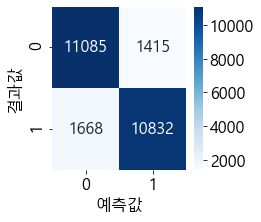

In [29]:
# --> 5를 분류할 때 가장 많이 혼란스러워 한다.
# --> 오차행렬은 모델의 강점과 약점을 파악하기에 유용하다.
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (3, 3)

# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

In [30]:
texts = ['This is best', 'not good', 'It is the worst movie ever.']

In [31]:
tokenizer = Tokenizer(num_words = num_words, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

In [32]:
sequences = tokenizer.texts_to_sequences(texts)
sequences

[[3, 2, 4], [5, 6], [7, 2, 8, 9, 10, 11]]

In [33]:
pad = pad_sequences(sequences, maxlen=max_len, padding = 'pre')
pad

array([[ 0,  0,  0, ...,  3,  2,  4],
       [ 0,  0,  0, ...,  0,  5,  6],
       [ 0,  0,  0, ...,  9, 10, 11]])

In [34]:
result = model.predict(pad)
np.round(result)

array([[0.],
       [1.],
       [0.]], dtype=float32)